<a href="https://colab.research.google.com/github/mahasnehr/Assignment-1-Boston-housing-Prices-Prediction/blob/main/Last_version_03_of_Best_ModelRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import load_boston
#<TODO> # Keras imports : model, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD, Adam 
import numpy as np 
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn import preprocessing
from tensorflow.keras.layers import Dense, Activation
import seaborn as sns 
import numpy as np
import copy
import matplotlib.pyplot as plt
import os
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import layers
from tensorflow.keras import activations
np.random.seed(1)

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
506
13
(506, 14)


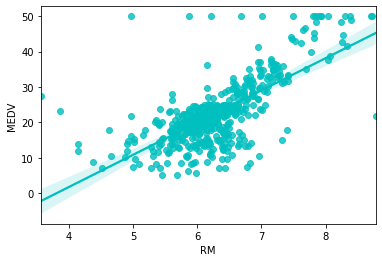

In [ ]:
# load Boston Housing dataset
X, Y = load_boston(return_X_y=True)
 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/content/housing_withoutheader.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))
nb_samples = X.shape[0]
print(X.shape[0])
print(X.shape[1])
print(np.shape(data))

from sklearn import preprocessing
# scale data
min_max_scaler = preprocessing.MinMaxScaler()

#plot scatter between prices and number of rooms....etc
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
prices=data['MEDV']
attributes = data.drop('MEDV', axis = 1)
sns.regplot(x=attributes['RM'],y= prices,color='c')
sns.set_style("whitegrid")
 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


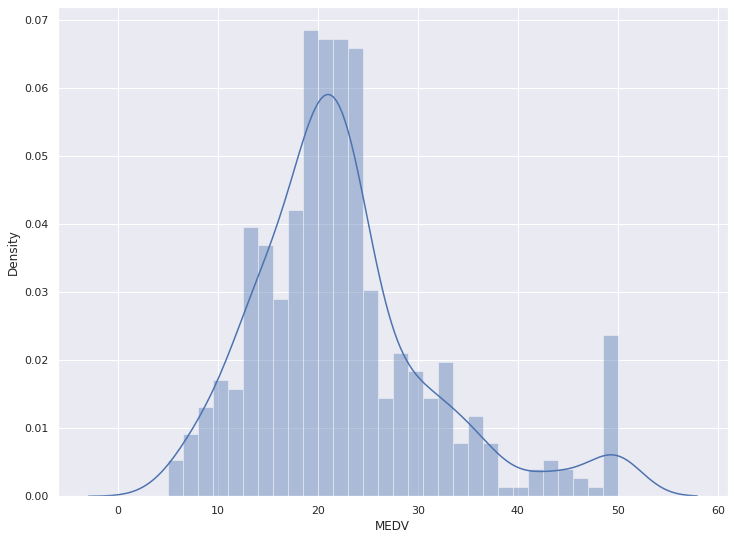

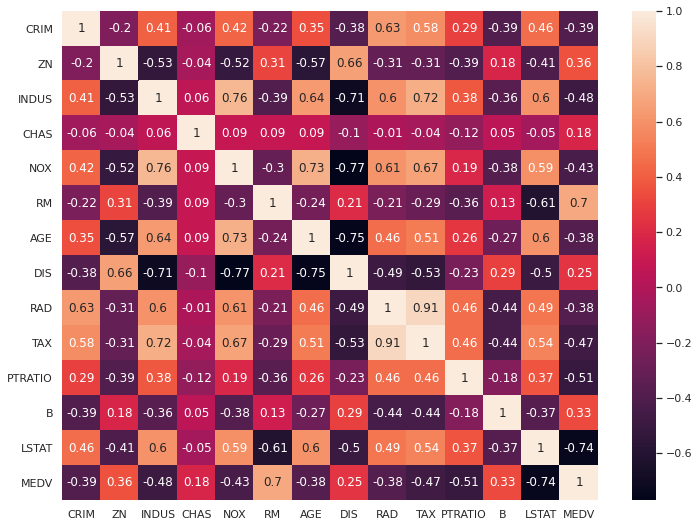

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:



'''
v_point = <TODO>
t_point = <TODO>

X_train = <TODO>
Y_train = <TODO>
X_valid = <TODO>
Y_valid = <TODO>
X_test  = X[t_point:]
Y_test  = Y[t_point:]
'''
nb_samples = len(data)
print(len(data))
#X = np.zeros((nb_samples, 2))
#Y = np.zeros(nb_samples)
valid_split = 0.2
test_split  = 0.1
 # train, valid , test split
v_point = int(nb_samples*(1-valid_split-test_split))
t_point = int(nb_samples*(1-test_split))
print(v_point)
print(t_point)
X_train = X[0:v_point]
Y_train = Y[0:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

scaler = preprocessing.StandardScaler()
#scaler=(((X-np.mean(X))/np.std(X)))

'''
# Preparing the dataset
#Normalizing the dataset. convert each feature to mean = 0 and std.dev =1
train_mean = train_data.mean(axis=0)
train_data -=train_mean
train_std = train_data.std(axis=0)
train_data /= train_std
 

test_data -= train_mean
test_data /= train_std


'''
 

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)

X_valid_scaled = min_max_scaler.fit_transform(X_valid)

X_test_scaled = min_max_scaler.fit_transform(X_test)

#scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#print((scores.mean(), scores.std()))
scaler = preprocessing.StandardScaler() #(((X-np.mean(X))/np.std(X)))
X_train = scaler.fit_transform(X_train_scaled)
X_valid = scaler.transform(X_valid_scaled)
X_test  = scaler.transform(X_test_scaled)

mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train /= std

#Normalizing the dataset. convert each feature to mean = 0 and std.dev =1
   
X_test -= mean
X_test /= std

print("TRAINING MEAN:",np.mean(X_train),", VARIANCE:",np.std(X_train) )
print("VALIDATION MEAN:",np.mean(X_valid),", VARIANCE:",np.std(X_valid) )
print("TEST MEAN:",np.mean(X_test),", VARIANCE:",np.std(X_test) )

506
354
455
TRAINING MEAN: -6.17594729039635e-17 , VARIANCE: 1.0
VALIDATION MEAN: 0.5112460489496429 , VARIANCE: 1.9538002125844907
TEST MEAN: 0.36509400729619135 , VARIANCE: 1.4204880507837168


In [ ]:
def build_model():
  model = Sequential() 
#arr1, arr2 = model.layers[0].get_weights()
#print(arr1.shape, arr2.shape)
#model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_shape=(arr1.shape[0],)))
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_shape=(X.shape[1],))) # asymetric function
#model.add(Dense(10))
  model.add(Dropout(0.7))


  model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
#without batch normalization I got better Results 6.2 val_Mae


#model.add(layers.Dense(64))
#model.add(layers.Activation(activations.relu))

  model.add(Dense(1))
 
  
 # ### the above can be replaced by model = LinearRegression() 

#model.compile(optimizer=Adam(lr=0.1),loss='mse',metrics=['mae'])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
# I get error when I use this model.compile(optimizer=SGD(learning_rate=0.5, momentum=0.01), loss='mse', metrics=['mae'])    
# best model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


  return model

In [ ]:
model=build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.advanced_activations import LeakyReLU
tensorboard_callback = TensorBoard(log_dir="./logs", write_graph=True, histogram_freq=1)
es = EarlyStopping(patience=100, monitor='mae', restore_best_weights=True) #accuracy, loss, val_loss, val_accuracy 
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #',i)
    val_data = X_train[i*num_val_samples : (i+1)*num_val_samples] # Divide out the validation set part
    val_targets = Y_train[i*num_val_samples : (i+1)*num_val_samples]

    partial_train_data = np.concatenate([X_train[:i*num_val_samples],X_train[(i+1)* num_val_samples:] ],axis=0) # Stitch the training set together
    partial_train_targets = np.concatenate([Y_train[:i*num_val_samples],Y_train[(i+1)* num_val_samples:] ],axis=0)

    model = build_model()
    # model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,verbose=1,validation_data = (X_valid,Y_valid),callbacks = [tensorboard_callback, es],shuffle = True)#Model training silent model
    
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,verbose=1,shuffle = True)#Model training silent model
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # Validation set evaluation
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
17/17 [==============================] - 1s 1ms/step - loss: 782.1993 - mae: 26.4050
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 646.7774 - mae: 23.2376
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 529.2861 - mae: 20.6151
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 406.8913 - mae: 17.8961
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 338.0308 - mae: 15.7082
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 205.7380 - mae: 12.2087
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 159.1091 - mae: 10.3605
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 127.9847 - mae: 9.1219
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 122.8238 - mae: 8.9607
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 150.3218 - mae: 9.8716
Epoch 11/100

In [ ]:

tensorboard_callback = TensorBoard(log_dir="./logs", write_graph=True, histogram_freq=1)
es = EarlyStopping(patience=100, monitor='mae', restore_best_weights=True) #accuracy, loss, val_loss, val_accuracy 
history = model.fit(X_train, Y_train,
          batch_size=32, # 700 / 32 ~= 22    # 8...512
          epochs = 200,
          verbose = 1,  #0,1,2
          validation_data = (X_valid,Y_valid),
          callbacks = [tensorboard_callback, es],
          shuffle = True
          )

Epoch 1/200
12/12 [==============================] - 0s 18ms/step - loss: 22.1614 - mae: 3.3264 - val_loss: 125.5374 - val_mae: 10.1077
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 20.2208 - mae: 3.0586 - val_loss: 122.2586 - val_mae: 9.9113
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 19.0492 - mae: 3.1880 - val_loss: 121.7631 - val_mae: 9.9247
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 17.4969 - mae: 3.0570 - val_loss: 109.9321 - val_mae: 9.2858
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 21.2071 - mae: 3.4277 - val_loss: 130.0834 - val_mae: 10.3814
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 16.3241 - mae: 2.9258 - val_loss: 131.3072 - val_mae: 10.4075
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 14.6041 - mae: 2.8878 - val_loss: 125.5463 - val_mae: 10.1385
Epoch 8/200
12/12 [==============================] - 0s 5

In [ ]:
test_loss,test_accuracy = model.evaluate(X_train,Y_train)
print('loss:',test_loss)

12/12 [==============================] - 0s 2ms/step - loss: 81.6445 - mae: 5.8567
loss: 81.64452362060547


In [ ]:
test_mse_score,test_mae = model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 12.4532 - mae: 2.8166


In [ ]:
print(test_mae)

2.816582679748535


In [ ]:
# the first 2 inputs from the training data

predictions = model.predict(X_train_scaled[:2])

print(predictions)
print(Y_train[:2])



[[20.89388 ]
 [20.842922]]
[24.  21.6]
